### Фильтрация файла от строк где референс равен альтернативному варианту

In [ ]:
!bcftools view -e 'ALT=REF' soy.vcf -Oz -o clean_data.vcf


In [ ]:
!plink --vcf clean_data.vcf --double-id --make-bed --out data0 # приведение формата к plink


PLINK v1.9.0-b.8 64-bit (22 Oct 2024)              cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data0.log.
Options in effect:
  --double-id
  --make-bed
  --out data0
  --vcf clean_data.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: data0-temporary.bed + data0-temporary.bim + data0-temporary.fam written.
21896 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data0.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.882088.
21896 variants and 153 people pass filters and QC.
Note: No phenotype

In [ ]:
!plink --bfile data0 --maf 0.05 --geno 0.1 --make-bed --out data_qc # фильтрация записей


PLINK v1.9.0-b.8 64-bit (22 Oct 2024)              cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data_qc.log.
Options in effect:
  --bfile data0
  --geno 0.1
  --maf 0.05
  --make-bed
  --out data_qc

16384 MB RAM detected; reserving 8192 MB for main workspace.
21896 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to data_qc.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.882088.
10691 variants removed due to missing genotype data (--geno).
0 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/-

In [ ]:
!plink --bfile data_qc --indep-pairwise 200 50 0.2 --out pruned # прунинг
!plink --bfile data_qc --extract pruned.prune.in --make-bed --out data_pruned


PLINK v1.9.0-b.8 64-bit (22 Oct 2024)              cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pruned.log.
Options in effect:
  --bfile data_qc
  --indep-pairwise 200 50 0.2
  --out pruned

16384 MB RAM detected; reserving 8192 MB for main workspace.
11205 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to pruned.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.957846.
11205 variants and 153 people pass filters and QC.
Note: No phenotypes present.
Pruned 294 variants from chromosome 1, leaving 77.
Pruned 502 varian

In [ ]:
!plink --bfile data_pruned --pca 10 --out pca #PCA


PLINK v1.9.0-b.8 64-bit (22 Oct 2024)              cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to pca.log.
Options in effect:
  --bfile data_pruned
  --out pca
  --pca 10

16384 MB RAM detected; reserving 8192 MB for main workspace.
11205 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to pca.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.957846.
11205 variants and 153 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete.
--pca: Results saved to pca.eigenval and pca.eigenvec 

/var/folders/9l/p32s8l9101nbvwf8js7npty40000gn/T/ipykernel_58761/2999392222.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("pca.eigenvec", delim_whitespace=True, header=None)


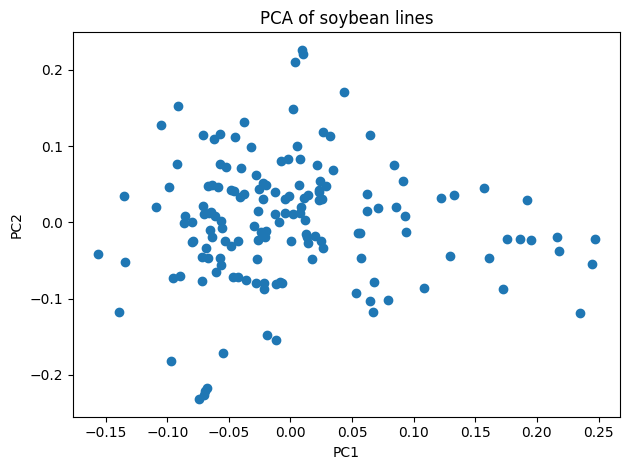

In [ ]:
# отрисовка графика
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("pca.eigenvec", delim_whitespace=True, header=None)
df.columns = ["FID", "IID"] + [f"PC{i}" for i in range(1, df.shape[1]-1)]

plt.scatter(df["PC1"], df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of soybean lines")
plt.tight_layout()
plt.show()


In [ ]:
!awk 'BEGIN{print "FID IID PC1 PC2 PC3 PC4 PC5 PC6 PC7 PC8 PC9 PC10"}{print $1,$2,$3,$4,$5,$6,$7,$8,$9,$10,$11,$12}' pca.eigenvec > Q_matrix.txt
!awk 'BEGIN{print "FID\tIID\tyield"} NR>1{print $1"\t"$1"\t"$2}' test_data.tsv > phenotypes_plink.tsv


In [ ]:
! plink  --bfile data_qc  --pheno phenotypes_plink.tsv --pheno-name yield  --covar Q_matrix.txt  --linear hide-covar  --allow-no-sex --out gwas_GLM  #GWAS


PLINK v1.9.0-b.8 64-bit (22 Oct 2024)              cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_GLM.log.
Options in effect:
  --allow-no-sex
  --bfile data_qc
  --covar Q_matrix.txt
  --linear hide-covar
  --out gwas_GLM
  --pheno phenotypes_plink.tsv
  --pheno-name yield

16384 MB RAM detected; reserving 8192 MB for main workspace.
11205 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to gwas_GLM.nosex .
99 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 covariates loaded.
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping ra

In [ ]:
! Rscript QQ.R gwas_GLM.assoc.linear gwas_soy # график QQ-plot


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/9l/p32s8l9101nbvwf8js7npty40000gn/T/ipykernel_58761/618407433.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("gwas_GLM.assoc.linear", sep="\s+")


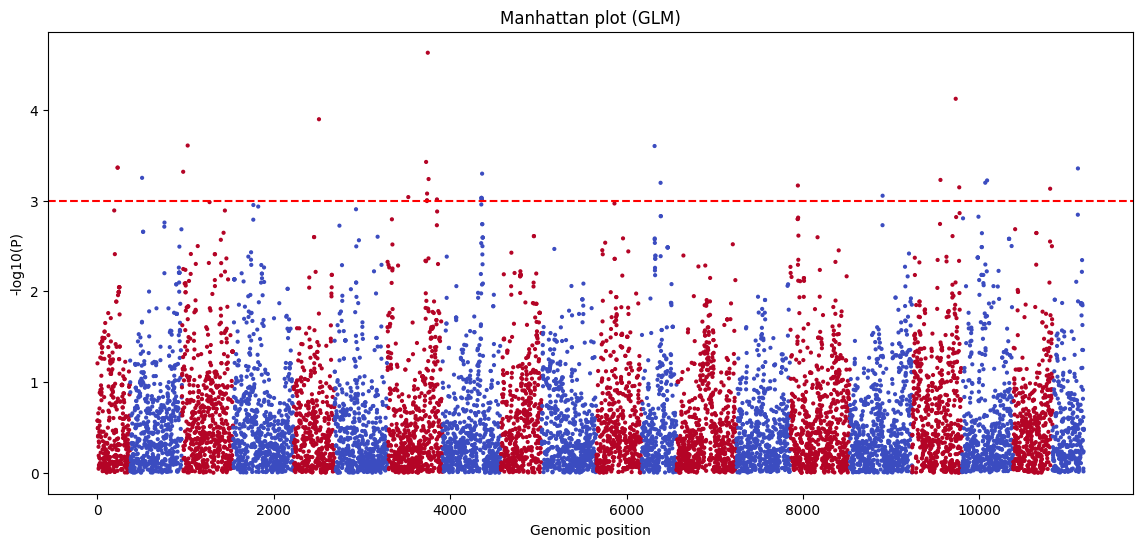

In [ ]:
# manhattan plot

import numpy as np
df = pd.read_csv("gwas_GLM.assoc.linear", sep="\s+")

df = df.dropna(subset=["P"])
df = df[df["P"] > 0]

df = df.sort_values(["CHR", "BP"])
df["pos"] = range(len(df))

plt.figure(figsize=(14,6))
plt.scatter(df["pos"], -np.log10(df["P"]), c=df["CHR"] % 2, s=4, cmap="coolwarm")
plt.axhline(y=3, color='red', linestyle='--')
plt.xlabel("Genomic position")
plt.ylabel("-log10(P)")
plt.title("Manhattan plot (GLM)")
plt.show()


In [ ]:
!plink  --bfile data_pruned  --distance square 1-ibs --out dist # расчет дистанций для филогенетического дерева


PLINK v1.9.0-b.8 64-bit (22 Oct 2024)              cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to dist.log.
Options in effect:
  --bfile data_pruned
  --distance square 1-ibs
  --out dist

16384 MB RAM detected; reserving 8192 MB for main workspace.
11205 variants loaded from .bim file.
153 people (0 males, 0 females, 153 ambiguous) loaded from .fam.
Ambiguous sex IDs written to dist.nosex .
Using up to 8 threads (change this with --threads).
Before main variant filters, 153 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.957846.
11205 variants and 153 people pass filters and QC.
Note: No phenotypes present.
Distance matrix calculation complete.
IDs written to dist.mdist.id .
distance_

In [ ]:
!Rscript plot_tree.R dist.mdist dist.mdist.id phylo_tree.pdf #отрисовка филогенетического дерева


null device 
          1 
